In [7]:
items=['TV','냉장고',' 전자레인지','컴퓨터', '선풍기','선풍기',' 믹서','믹서'] 

# LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit_transform(items)
label_encoder 

# OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = np.array(items).reshape(-1, 1)
onehot_encoder = OneHotEncoder()
onehot_encoder = onehot_encoder.fit_transform(items)
onehot_encoder.toarray()

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.]])

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

iris_data = load_iris()

dt_clf = DecisionTreeClassifier(random_state=42)
data = iris_data.data
label = iris_data.target

scores = cross_val_score(dt_clf, data, label, scoring = 'accuracy', cv = 3)

In [20]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris = iris['data']
iris_df = pd.DataFrame(iris)

In [21]:
from sklearn.preprocessing import MinMaxScaler

# iris_df.apply(lambda x:(x - x.min()) / (x.max() - x.min()))
scaler = MinMaxScaler()
iris_scaled = scaler.fit_transform(iris_df)
iris_df_scaled = pd.DataFrame(data = iris_scaled)

In [22]:
iris_df_scaled

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [23]:
from sklearn.datasets import load_wine 
wine = load_wine()

features = X = wine.data
labels = y = wine.target

In [25]:
from sklearn.tree import DecisionTreeClassifier
df_clf = DecisionTreeClassifier()

In [26]:
# 4개의 구간으로 나누세요
from sklearn.model_selection import cross_val_score

cross_val_score(df_clf, X, y, scoring='accuracy', cv=4)

array([0.93333333, 0.86666667, 0.88636364, 0.86363636])

In [44]:
np.bincount(labels)

array([59, 71, 48], dtype=int64)

In [43]:
import collections, numpy
collections.Counter(labels) 

Counter({0: 59, 1: 71, 2: 48})

In [42]:
from collections import Counter
Counter(labels) 

Counter({0: 59, 1: 71, 2: 48})

## 타이타닉

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titianic_df = pd.read_csv('titanic_train.csv')
titianic_df[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [46]:
titianic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
titianic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
# Age의 Null 값은 평균값으로
titianic_df['Age'].fillna(titianic_df['Age'].mean(), inplace = True)

# 나머지 Null 값은 'N'으로 채우기
titianic_df['Cabin'].fillna('N', inplace = True)
titianic_df['Embarked'].fillna('N', inplace = True)

titianic_df.isnull().sum().sum()
# 0

0

In [51]:
titianic_df = titianic_df.rename(columns = {'Sex' : 'Gender'})
titianic_df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [52]:
print('gender 분포 : \n', titianic_df['Gender'].value_counts())
print()
print('Cabin 값 분포 : \n', titianic_df['Cabin'].value_counts())
print()
print('Embarked 값 분포 : \n', titianic_df['Embarked'].value_counts())

gender 분포 : 
 male      577
female    314
Name: Gender, dtype: int64

Cabin 값 분포 : 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포 : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [53]:
titianic_df['Cabin'] = titianic_df['Cabin'].str[:1]
print(titianic_df['Cabin'][:3])

0    N
1    C
2    N
Name: Cabin, dtype: object


In [54]:
titianic_df.groupby(['Gender', 'Survived'])['Survived'].count()

Gender  Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

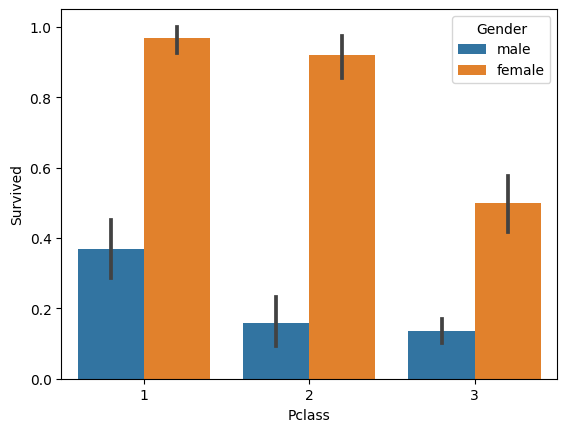

In [55]:
sns.barplot(titianic_df, x='Pclass', y='Survived', hue='Gender')

In [56]:
# 입력된 age에 다라 구분값을 반환하는 함수 작성
def get_category(age) :
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Tennager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

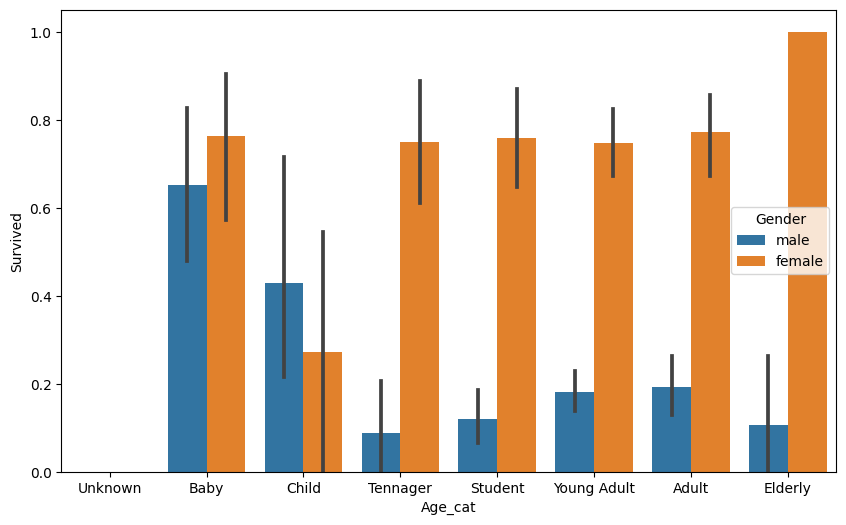

In [57]:
plt.figure(figsize = (10, 6))
group_names = ['Unknown', 'Baby', 'Child', 'Tennager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titianic_df['Age_cat'] = titianic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Gender', data = titianic_df, order = group_names)

In [58]:
# 사용해준 'Age_cat' 칼럼은 삭제해준다
titianic_df.drop('Age_cat', axis=1, inplace=True)

In [59]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF) :
    # 변환해줄 칼럼 명
    features = ['Cabin', 'Gender', 'Embarked']
    for feature in features :
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titianic_df = encode_features(titianic_df)
titianic_df[:3]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
titianic_df['Cabin'] = encoder.fit_transform(titanic['Cabin']).tolist()
titianic_df['Gender'] = encoder.fit_transform(titanic['Gender']).tolist()
titianic_df['Embarked'] = encoder.fit_transform(titanic['Embarked']).tolist()

In [60]:
# Null 처리 함수
def fillna(df) :
    df['Age'].fillna(titianic_df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df

# 알고리즘에 불필요한 피처 제거
def drop_features(df) :
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df

# 레이블 인코딩 수행
def format_features(df) :
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features :
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 위에서 설정한 데이터 전처리 함수들을 모두 호출하겠다.
def transform_features(df) :
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [61]:
# 데이터를 살펴보며 값이 변형되었을 수도 있기 때문에 데이터 재로딩
titianic_df = pd.read_csv('titanic_train.csv')

# feature data set와 data label set 추출
y_titanic_df = titianic_df['Survived']
x_titanic_df = titianic_df.drop('Survived', axis = 1)

X_titanic_df = transform_features(x_titanic_df)

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state=11)

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# random_state = 11 / 예제를 수행할 때마다 같은 결과를 출력하기 위한 용도
# 결정트리 
dt_clf = DecisionTreeClassifier(random_state=11)
# random_Forest
rf_clf = RandomForestClassifier(random_state=11)
# 로지스틱 회귀
# solver='liblinear'
# 로지스틱 회귀의 최적화 알고리즘을 liblinear로 설정하겠다
# 일반적으로 작은 데이터 셋에서의 이진 분류에 좋은 성능
lr_clf = LogisticRegression(solver='liblinear')


# DecisionTreeClassifier
# 학습
dt_clf.fit(X_train, y_train)
# 예측
dt_pred = dt_clf.predict(X_test)
# 평가
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))


#random_Forest 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('random_Forest 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))


# 로지스틱
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('로지스틱 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도 : 0.7877
random_Forest 정확도 : 0.8547
로지스틱 정확도 : 0.8659


In [68]:
def test(clf) :
    clf.fit(X_train, y_train)
    clf_pred = clf.predict(X_test)
    print('정확도 : {0:.4f}'.format(accuracy_score(y_test, clf_pred)))
    
for i in (dt_clf, rf_clf, lr_clf) :
    test(i)

# 정확도 : 0.7877
# 정확도 : 0.8547
# 정확도 : 0.8659

정확도 : 0.7877
정확도 : 0.8547
정확도 : 0.8659


In [89]:
from sklearn.model_selection import KFold

# 폴드 셋이 5개인 KFold 객체를 생성
def exec_kfold(clf, folds = 5) :
    kfold = KFold(n_splits = folds)
    # 예측 결과 저장을 위한 리스트 객체 생성
    scores = []
    
    
    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)) :
        # X_titianic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습
        clf.fit(X_train, y_train)
        # 예측
        clf_pred = clf.predict(X_test)
        # 정확도 계산
        accuracy = accuracy_score(y_test, clf_pred)
        
        # 리스트에 담아주기
        scores.append(accuracy)
        print('교차검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))
        
    # 5개의 폴드에서 평균 정확도 계산
    mean_score = np.mean(scores)
    print('평균 정확도 : {0:.4f}'.format(mean_score))
    
# 호출
print(exec_kfold(dt_clf, folds = 5))
print(exec_kfold(lr_clf, folds = 5))
print(exec_kfold(rf_clf, folds = 5))

교차검증 0 정확도 : 0.7542
교차검증 1 정확도 : 0.7809
교차검증 2 정확도 : 0.7865
교차검증 3 정확도 : 0.7697
교차검증 4 정확도 : 0.8202
평균 정확도 : 0.7823
None
교차검증 0 정확도 : 0.7933
교차검증 1 정확도 : 0.7921
교차검증 2 정확도 : 0.7753
교차검증 3 정확도 : 0.7472
교차검증 4 정확도 : 0.8427
평균 정확도 : 0.7901
None
교차검증 0 정확도 : 0.7933
교차검증 1 정확도 : 0.8090
교차검증 2 정확도 : 0.8371
교차검증 3 정확도 : 0.7753
교차검증 4 정확도 : 0.8596
평균 정확도 : 0.8148
None


In [112]:
from sklearn.model_selection import cross_val_score

def cross_val_score_test(clf) : 
    scores = cross_val_score(clf, X_titanic_df, y_titanic_df, cv = 5)
    for i, accuracy in enumerate(scores) :
        print('교차검증 {0} 정확도 : {1:.4f}'.format(i, accuracy))
    print('평균정확도 : {0:.4f}'.format(np.mean(scores)))

for j in  (dt_clf, rf_clf, lr_clf) :
    print(f'{j} 의 결과입니다')
    cross_val_score_test(j)
    print()
    

DecisionTreeClassifier
RandomForestClassifier
LogisticRegression


In [122]:
# cv = 5로 고정
# max_depth, min_samples_split, min_samples_leaf를 변경하면서 성능을 측정
from sklearn.model_selection import GridSearchCV

# 파라미터 설정
param = {
    'max_depth' : [2, 3, 5, 10],
    'min_samples_split' : [2, 3, 5], 
    'min_samples_leaf' : [1, 5, 8]
    }

# 함수 생성
def grid_clf(clf) :
    grid_clf = GridSearchCV(clf, param_grid = param, scoring='accuracy', cv = 5)
    grid_clf.fit(X_train, y_train)
    
    # 출력시 어떤 모델인지 확인하고 싶어서 추가
    s = str(clf).split('(')    
    print(f'{s[0]} 최적 하이퍼 파리미터 : ', grid_clf.best_params_)
    print(f'{s[0]} 최고 정확도 : ', round(grid_clf.best_score_, 4))
    best_clf = grid_clf.best_estimator_
    
    # GridSearchCV의 최적 하이퍼 파리미터로 학습된 Estimator로 예측 및 평가
    good_pred = best_clf.predict(X_test)
    accuracy = accuracy_score(y_test, good_pred)
    print('테스트 셋에서의 정확도 : {0:.4f}'.format(accuracy))
    

# 실행해보기....두근
for j in (dt_clf, rf_clf) :
    grid_clf(j)

DecisionTreeClassifier 최적 하이퍼 파리미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
DecisionTreeClassifier 최고 정확도 :  0.7992
테스트 셋에서의 정확도 : 0.8715
RandomForestClassifier 최적 하이퍼 파리미터 :  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
RandomForestClassifier 최고 정확도 :  0.8146
테스트 셋에서의 정확도 : 0.8827


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
333,3,1,16.0,2,0,18.0000,7,3
662,1,1,47.0,0,0,25.5875,4,3
382,3,1,32.0,0,0,7.9250,7,3
331,1,1,45.5,0,0,28.5000,2,3
149,2,1,42.0,0,0,13.0000,7,3
...,...,...,...,...,...,...,...,...
269,1,0,35.0,0,0,135.6333,2,3
337,1,0,41.0,0,0,134.5000,4,0
91,3,1,20.0,0,0,7.8542,7,3
80,3,1,22.0,0,0,9.0000,7,3


In [119]:
grid_clf = GridSearchCV(dt_clf, param_grid = param, scoring='accuracy', cv = 5)
grid_clf.fit(X_train, y_train)
    
# 출력시 어떤 모델인지 확인하고 싶어서 추가 
print(' 최적 하이퍼 파리미터 : ', grid_clf.best_params_)
print('최고 정확도 : {0:.4f}'.format(grid_clf.best_score_))
best_clf = grid_clf.best_estimator_
    
# GridSearchCV의 최적 하이퍼 파리미터로 학습된 Estimator로 예측 및 평가
good_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, good_pred)
print('테스트 셋에서의 정확도 : {0:.4f}'.format(accuracy))

 최적 하이퍼 파리미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
최고 정확도 : 0.7992
테스트 셋에서의 정확도 : 0.8715


In [ ]:
# 왜 로지스틱 회귀는 grid가 안되었는가?

In [153]:
params = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 5, 10]}

lrc_grid = GridSearchCV(lr_clf, param_grid = params, scoring='roc_auc', cv = 5)
lrc_grid.fit(X_train, y_train)

print('최적 하이퍼 파라미터:', lrc_grid.best_params_)
print('최고 정확도 : {0:.4f}'.format(lrc_grid.best_score_))

best_lrc = lrc_grid.best_estimator_
# GridSearchCV의 최적 하이퍼 파리미터로 학습된 Estimator로 예측 및 평가
good_pred = best_lrc.predict(X_test)
accuracy = accuracy_score(y_test, good_pred)
print('테스트 셋에서의 정확도 : {0:.4f}'.format(accuracy))

최적 하이퍼 파라미터: {'C': 5, 'penalty': 'l1'}
최고 정확도 : 0.8444
테스트 셋에서의 정확도 : 0.8547


In [126]:
rf_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [127]:
print(len(y_test), len(rf_pred))

179 179


In [128]:
accuracy_score(y_test, rf_pred)

0.8547486033519553

In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 혼동행렬 만들어보기
confusion_matrix(y_test, rf_pred)

array([[107,  11],
       [ 15,  46]], dtype=int64)

In [130]:
(107+46) / (107+11+15+46)

0.8547486033519553

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [146]:
# 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
def get_clf_eval(y_test , pred):
    # 오차행렬
    confusion = confusion_matrix( y_test, pred)
    # 정확도
    accuracy = accuracy_score(y_test , pred)
    # 정밀도
    precision = precision_score(y_test , pred)
    # 재현율
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))
    print()




# 임계값을 0.4에서 0.6까지 0.05씩 증가시키며 평가 지표 조사
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

from sklearn.preprocessing import Binarizer
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        # Binarizer()는 threshold보다 작거나 같으면 0, 크면 1을 반환한다.
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        
        # binarizerf를 이용하여 transform(fit은 해주지 않는다.)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test , custom_predict)        


# predict_proba( ) 를 통하여 개별 레이블별 예측확률을 반환받을 수 있다
# 반환되는 ndarraysms 첫번째 칼럼이 클래스 값 0에 대한 예측확률
# 두번째 칼럼이 클래스 값 1에 대한 예측확률이다
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
오차 행렬
[[99 19]
 [13 48]]
정확도: 0.8212, 정밀도: 0.7164, 재현율: 0.7869

임곗값: 0.45
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705

임곗값: 0.5
오차 행렬
[[109   9]
 [ 14  47]]
정확도: 0.8715, 정밀도: 0.8393, 재현율: 0.7705

임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377

임곗값: 0.6
오차 행렬
[[112   6]
 [ 17  44]]
정확도: 0.8715, 정밀도: 0.8800, 재현율: 0.7213



C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [147]:
# 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
def get_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    
    # f1 score print
    print('정확도 : {0:.4f}, 정밀도:{1:.4f}, 재현율 : {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))
    print()
    
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

임곗값: 0.4
오차행렬
[[99 19]
 [13 48]]
정확도 : 0.8212, 정밀도:0.7164, 재현율 : 0.7869, F1:0.7500

임곗값: 0.45
오차행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도:0.8246, 재현율 : 0.7705, F1:0.7966

임곗값: 0.5
오차행렬
[[109   9]
 [ 14  47]]
정확도 : 0.8715, 정밀도:0.8393, 재현율 : 0.7705, F1:0.8034

임곗값: 0.55
오차행렬
[[111   7]
 [ 16  45]]
정확도 : 0.8715, 정밀도:0.8654, 재현율 : 0.7377, F1:0.7965

임곗값: 0.6
오차행렬
[[112   6]
 [ 17  44]]
정확도 : 0.8715, 정밀도:0.8800, 재현율 : 0.7213, F1:0.7928



C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [149]:
from sklearn.metrics import roc_curve

# Positive 확률
lr_pred_proba_po = lr_clf.predict_proba(X_test)[:,1].reshape(-1,1)

# FPR(1-특이도), TPR(재현율=민감도), Threshold
# 임계값이 큰 값부터 작은 값 순서이다.
FPRs, TPRs, thresholds = roc_curve(y_test, lr_pred_proba_po)
print("임계값 배열:", thresholds.shape)

# 일부 threshold만 사용
# roc_curve에서 thresholds[0]은 max(예측확률)+1로 임의 설정된다. 이를 제외하기 위해 np.arange는 1부터 시작
thr_idx = np.arange(1, thresholds.shape[0], 10)

print("샘플 추출을 위한 배열의 index : ", thr_idx)
print("샘플 index로 추출한 임계값:", np.round(thresholds[thr_idx],2))
print("샘플 임계값별 FPR:", np.round(FPRs[thr_idx],3))
print("샘플 임계값별 TPR:", np.round(TPRs[thr_idx],3))

임계값 배열: (51,)
샘플 추출을 위한 배열의 index :  [ 1 11 21 31 41]
샘플 index로 추출한 임계값: [0.95 0.64 0.4  0.22 0.13]
샘플 임계값별 FPR: [0.    0.042 0.161 0.322 0.669]
샘플 임계값별 TPR: [0.016 0.656 0.787 0.902 0.967]


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


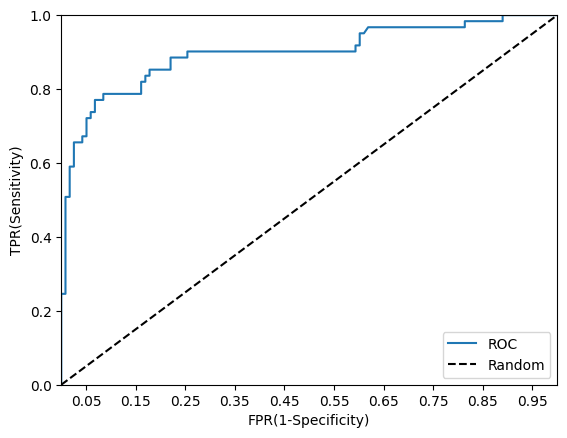

In [151]:
def roc_curve_plot(y_test, pred_proba_po):
    # FPR(1-특이도), TPR(재현율=민감도), Threshold
    # precision_recall_curve와는 다르게 임계값이 큰 값부터 작은 값 순서이다.
    FPRs, TPRs, thresholds = roc_curve(y_test, pred_proba_po)
    
    # ROC 곡선을 그래프 곡선으로 그린다
    plt.plot(FPRs, TPRs, label ="ROC")
        
    # 기준값(?인 가운데 대각선 직선을 그린다
    plt.plot( [0,1], [0,1], "k--", label="Random")
    
    # x축 스케일 0.1 단위로 조정
    start, end = plt.xlim()
    plt.xticks( np.round( np.arange(start, end, 0.1), 2))
    
    # 기타 옵션
    plt.xlim(0,1), plt.ylim(0,1)
    plt.xlabel("FPR(1-Specificity)"), plt.ylabel("TPR(Sensitivity)")
    plt.legend()
    
    # 그래프 보기
    plt.show()
    
# Positive 확률
lr_pred_proba_po = lr_clf.predict_proba(X_test)[:,1].reshape(-1,1)
roc_curve_plot(y_test, lr_pred_proba_po)